# Convolutional neural networks (CNNs): an Introduction

## Agenda

- Very light theory of Supervised Learning and CNNs
- Hands-on practice: Image recognition with TensorFlow (Keras)

## What is a CNN?

- A type of **Supervised learning**:
    - Supervised machine learning algorithms are designed to **learn by example**.
    - Most common subbranch of machine learning today!

## Real world examples:

- CNNs apply to image processing, natural language processing and other kinds of cognitive tasks.
    - Face recognition, tumor diagnosis, translations, chat bots, vision for driverless autonomous cars, personalized shopping, etc


## Example

![](https://miro.medium.com/max/2400/1*oB3S5yHHhvougJkPXuc8og.gif)

### CNN Layers

- Visible Input layer:
    - In case of image, its dimensions are proportional/equal to the image size in pixels
- Visible Output layer:
    - Classification: outputs often a probability (between 0 and 1) for each of the categories
    - Regression
- N Hidden layers


## How does it work?


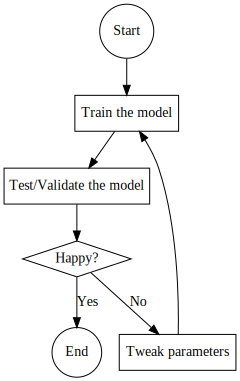

In [1]:
# Flowchart to show how CNNs work

from graphviz import Digraph

dot = Digraph(
    name='cnn',
    node_attr={'shape': 'rect'},
)

# Add nodes
dot.node('0', 'Start', shape='circle')
dot.node('1', 'Train the model')
dot.node('2', 'Test/Validate the model')
dot.node('3', 'Happy?', shape='diamond')
dot.node('4', 'Tweak parameters')
dot.node('5', 'End', shape='circle')

# Add edges
dot.edge('0', '1')
dot.edge('1', '2')
dot.edge('2', '3')
dot.edge('3', '4', label='No')
dot.edge('4', '1')
dot.edge('3', '5', label='Yes')


dot

### Training & Testing: Labels

![](imgs/tds.png)

### Use model (binary) in Web App or Mobile App

* Note that massive amounts of computing power are needed to build the model, but it then can be used in a mobile phone!
* The first step toward artificial neural networks came in 1943 when Warren McCulloch, a neurophysiologist, and a young mathematician, Walter Pitts, wrote a paper on how neurons might work. They modeled a simple neural network with electrical circuits.
* 2000's CNNs gain traction with Parallel matrix computations (GPUs and multi-core CPUs)

### Testing vs Validation

Note: some models use a Train, Validation and Test split.

![](https://miro.medium.com/max/700/1*Nv2NNALuokZEcV6hYEHdGA.png)

> For example on many Kaggle competitions, the validation set is released initially along with the training set and the actual test set is only released when the competition is about to close, and it is the result of the the model on the Test set that decides the winner.

### Chihuahua or muffin?


![](https://cdn-media-1.freecodecamp.org/images/1*bt-E2YcPafjiPbZFDMMmNQ.jpeg)

## Layers

A CNN has an input layer, an output layer and various hidden layers. Some of these layers are convolutional, using a mathematical model to pass on results to successive layers. This simulates some of the actions in the human visual cortex.

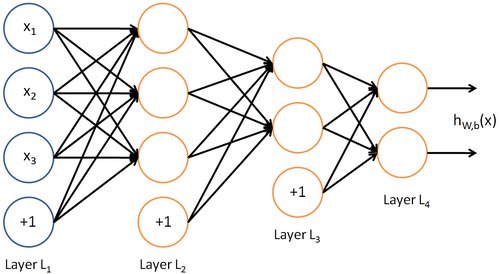



## Biology

**Neurons**

- Signals can be received from dendrites, and sent down the axon once enough signals were received. 
- This outgoing signal can then be used as another input for other neurons, repeating the process. 
- Some signals are more important than others and can trigger some neurons to fire easier.
- Connections can become stronger or weaker, new connections can appear while others can cease to exist.

![](https://krisbolton.com/images/posts/2018/neuron-annotated.jpg)


**Perceptrons**

![](https://miro.medium.com/max/651/1*UA30b0mJUPYoPvN8yJr2iQ.jpeg)


Importance of Bias: The main function of Bias is to provide every node with a trainable constant value (in addition to the normal inputs that the node receives)


**Activation function**

Activation functions for perceptrons (step function, that would either output 0 or 1 if the sum of weights was larger than the threshold) and for the first artificial neurons (sigmoid function, that always outputs values between 0 and 1).

![](https://www.kdnuggets.com/wp-content/uploads/activation.png)




# MNIST handwritten digit database


The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of small square 28x28 pixel (784 bytes flatten) grayscale images of handwritten single digits between 0 and 9.


![](https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)



### Example: Basic classification MNIST

https://www.tensorflow.org/tutorials/keras/classification

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [3]:
# to have reproducible results
np.random.seed(123)

In [4]:
mnist = tf.keras.datasets.mnist

**Training Dataset**: The sample of data used to fit the model.

**Test Dataset**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.|

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

![](https://developers.google.com/machine-learning/crash-course/images/PartitionTwoSets.svg)

In [6]:
# print length of the datasets

print(f"len train = {len(train_images)}; len test = {len(test_images)}; "
      f"(Test set = {len(test_images)/len(train_images)*100:.2f}%)")


len train = 60000; len test = 10000; (Test set = 16.67%)


In [7]:
# Training images shape
train_images.shape

(60000, 28, 28)

In [8]:
# Training labels shape

# Note: This shoud be (60000,10)!!!!!

train_labels.shape

(60000,)

In [9]:
# let's see what train_labels contains

# Note the absolute value and not the category/class! More on this later.

[i for i in train_labels[:20]]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9]

In [10]:
%matplotlib widget

# Let's see how the first 20 images of the training dataset look like:

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(False)
colorbar = None


def plot_image(i):
    global colorbar
    if colorbar:
        colorbar.remove()
    plot = ax.imshow(train_images[i], cmap=plt.cm.binary)
    colorbar = ax.figure.colorbar(plot, ax=ax)
    ax.set_xlabel(f"Label: {train_labels[i]}", fontsize=12)


@widgets.interact(pos=(0, 20, 1))
def update(pos=0):
    plot_image(pos)
    fig.canvas.draw_idle()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='pos', max=20), Output()), _dom_classes=('widget-interact…

## Data Preparation

In [11]:
# Normalize the data

# Unnormalized inputs to activation functions =>  stuck in a very flat region in the domain and may not learn at all.

# Data from 0 to 1 instead of 0 to 255

train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
# convert class vectors to binary class matrices

categories = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

train_labels_category = tf.keras.utils.to_categorical(train_labels, len(categories))

test_labels_category = tf.keras.utils.to_categorical(test_labels, len(categories))

In [13]:
train_labels_category.shape

(60000, 10)

In [14]:
train_labels[0], train_labels_category[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

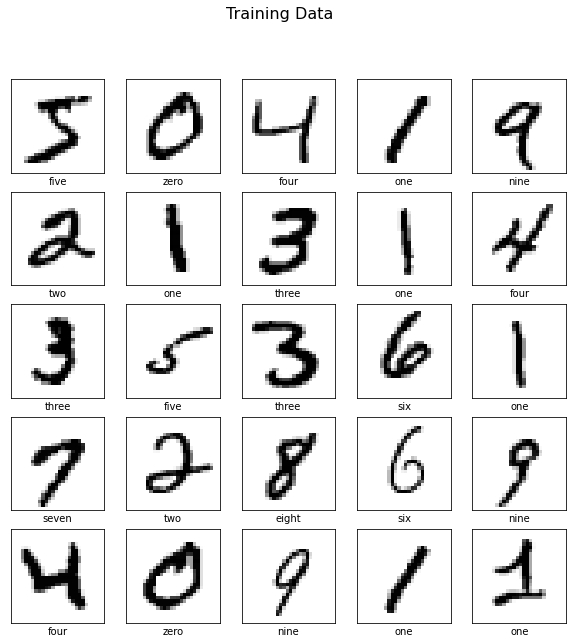

In [15]:
%matplotlib inline

# Let's plot the 25 first digits using the categories names

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Training Data', fontsize=16)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(categories[train_labels[i]])
plt.show()

## Model definition

### 3 layers:

- Input layer: 784 (28x28 images flatten) inputs
- Output layer: 10 neurons with **softmax** activation function
- Hidden layer: 128 neurons with the  rectified linear activation function (ReLU)*


**ReLU*:**

- It's cheap to compute as there is no complicated math.
    - The model can therefore take less time to train or run.
- It converges faster.
- It's sparsely activated. Since ReLU is zero for all negative inputs, it's likely for any given unit to not activate at all.

![](https://achintavarna.files.wordpress.com/2017/11/mnist_2layers.png?w=634)


### Softmax
![image.png](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac.webp)

### In matrix form:

![](imgs/Shapes.png)



In [16]:
# Sequential groups a linear stack of layers

model = tf.keras.Sequential([
    # Flatten 28*28 = 784
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compile - Configures the model for training

### Loss function

This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

<img src="https://miro.medium.com/max/725/1*lUUmNbjMNS1rfX4El9i5VA.png" style="width: 400px;"/>

### Optimizer

This is how the model is updated based on the data it sees and its loss function.

<img src="https://miro.medium.com/max/2400/1*hT12fHjYZJPXCCxjCWvM3w.png" style="width: 600px;"/>

### Metrics

Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.



In [17]:
# Let's configures the model for training.

model.compile(
    # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    optimizer='adam',
    # https://www.tensorflow.org/api_docs/python/tf/keras/losses
    loss=tf.keras.losses.CategoricalCrossentropy(),
    # https://www.tensorflow.org/api_docs/python/tf/keras/metrics
    metrics=['accuracy'] # Calculates how often predictions equal labels.
)

## Fit 

### Trains the model for a fixed number of epochs (iterations on a dataset)

- Finds W and b that minimizes the loss (maximize accuracy)




In [18]:
# 10 x 60 000 images
epochs = 10

# Number of images to minimize the matrix above
# 100 x 600 = 60 000 images
batch_size = 100


history = model.fit(
    train_images, train_labels_category, batch_size=batch_size, epochs=epochs)

Epoch 1/10
600/600 [==============================] - 6s 9ms/step - loss: 0.5691 - accuracy: 0.8476
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1707 - accuracy: 0.9518
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1191 - accuracy: 0.9658
Epoch 4/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0854 - accuracy: 0.9751
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0663 - accuracy: 0.9810
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0558 - accuracy: 0.9829
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0451 - accuracy: 0.9873
Epoch 8/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0374 - accuracy: 0.9897
Epoch 9/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0329 - accuracy: 0.9909
Epoch 10/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0269 - accuracy: 0.9928

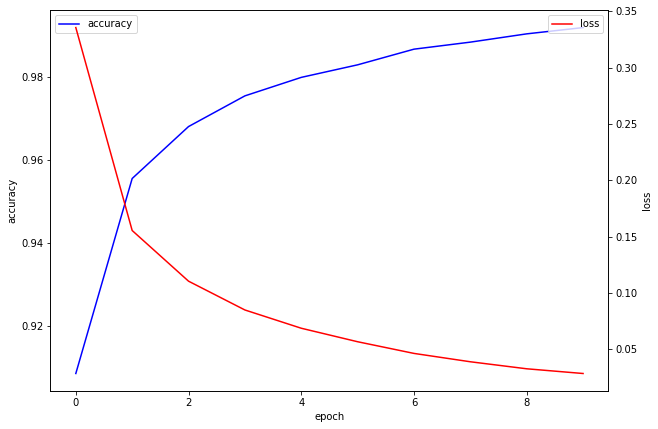

In [19]:
%matplotlib inline

# Let's plot the training over time / epochs

fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.plot(history.epoch, history.history['accuracy'], 'b-', label='accuracy')

ax2 = ax1.twinx()

ax2.set_ylabel('loss')
ax2.plot(history.epoch, history.history['loss'], 'r-', label='loss')

ax1.legend()
ax2.legend()


In [20]:
# Evaluate accuracy with the test set

# Note: see the difference between in loss and accuracy in the train and test data

test_loss, test_acc = model.evaluate(test_images,  test_labels_category, verbose=2)


313/313 - 4s - loss: 0.0714 - accuracy: 0.9791


### Problems

- Overfitting occurs when our model becomes really good at being able to classify or predict on data that was included in the training set, but is not as good at classifying data that it wasn’t trained on. So essentially, the model has overfit the data in the training set.

- **TODO**: The training accuracy and the evaluation should be similar

# Predictions



In [21]:
predictions = model.predict(test_images)
predictions

array([[2.6840674e-08, 3.1350297e-10, 3.4606792e-06, ..., 9.9996626e-01,
        1.3853372e-07, 3.5455962e-06],
       [1.6949862e-07, 3.8653157e-05, 9.9996078e-01, ..., 8.3143351e-14,
        2.3183306e-08, 4.0548839e-13],
       [1.3898126e-06, 9.9802685e-01, 7.4035069e-04, ..., 7.5448659e-04,
        3.5089336e-04, 5.0995332e-06],
       ...,
       [2.7655794e-12, 1.9763633e-12, 1.2673014e-11, ..., 3.1775733e-06,
        4.8625924e-07, 2.1374724e-05],
       [4.7824301e-08, 2.0406923e-11, 2.7660055e-10, ..., 8.8099716e-10,
        2.1468710e-05, 3.1320273e-11],
       [1.5051040e-09, 2.1800940e-12, 8.0836644e-09, ..., 3.8675874e-13,
        2.1863976e-10, 2.0571244e-11]], dtype=float32)

In [22]:
predictions.shape

(10000, 10)

In [23]:
# Let's pretiffy the predictions

from tabulate import tabulate

max_index = 20

l = [np.append(p, l) for p, l in zip(predictions[0:max_index], test_labels[0:max_index])]

print(tabulate(
    l,
    headers=categories + ["Label"],
    showindex=True,
    floatfmt=".4f"
))

      zero     one     two    three    four    five     six    seven    eight    nine    Label
--  ------  ------  ------  -------  ------  ------  ------  -------  -------  ------  -------
 0  0.0000  0.0000  0.0000   0.0000  0.0000  0.0000  0.0000   1.0000   0.0000  0.0000   7.0000
 1  0.0000  0.0000  1.0000   0.0000  0.0000  0.0000  0.0000   0.0000   0.0000  0.0000   2.0000
 2  0.0000  0.9980  0.0007   0.0000  0.0001  0.0000  0.0000   0.0008   0.0004  0.0000   1.0000
 3  0.9997  0.0000  0.0000   0.0000  0.0000  0.0000  0.0002   0.0000   0.0000  0.0000   0.0000
 4  0.0000  0.0000  0.0000   0.0000  0.9976  0.0000  0.0000   0.0000   0.0000  0.0024   4.0000
 5  0.0000  0.9854  0.0000   0.0000  0.0000  0.0000  0.0000   0.0146   0.0000  0.0000   1.0000
 6  0.0000  0.0000  0.0000   0.0000  0.9999  0.0000  0.0000   0.0000   0.0001  0.0000   4.0000
 7  0.0000  0.0000  0.0000   0.0000  0.0003  0.0000  0.0000   0.0000   0.0000  0.9996   9.0000
 8  0.0000  0.0000  0.0000   0.0000  0.0000  0.998

In [24]:
# Let's get inaccurate predictions:  0.4 < accuracy < 0.6

dodgy_predictions = []
for index, p in enumerate(predictions):
    for i in p:
        if i > 0.4 and i < 0.6:
            dodgy_predictions.append(index)
            break

len(dodgy_predictions)

101

In [25]:
from ipywidgets import Layout, IntSlider, interact
%matplotlib widget

# Let's plot the dodgy predictions


# set up plot
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2.4, 2]})
fig.suptitle('Dodgy predictions', fontsize=16)
ax1.grid(False)
ax2.grid(False)


def plot_image(i):
    ax1.imshow(test_images[i], cmap=plt.cm.binary)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlabel(f"True Label: {test_labels[i]}", fontsize=14)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax2.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2f' % height,
                ha='center', va='bottom')


def plot_value_array(i):
    ax2.clear()
    true_label = test_labels[i]
    ax2.set_xticks(range(10))
    thisplot = ax2.bar(range(10), predictions[i], color="#777777")
    ax2.set_ylim([0, 1])
    predicted_label = np.argmax(predictions[i])
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    ax2.set_xlabel(f"Predicted: {np.argmax(predictions[i])}", fontsize=14)
    autolabel(thisplot)


slider = widgets.SelectionSlider(
    options=dodgy_predictions,
    value=dodgy_predictions[0],
    layout=Layout(width='95%')
)

@widgets.interact(pos=slider)
def update(pos):
    plot_image(pos)
    plot_value_array(pos)
    fig.canvas.draw_idle()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(SelectionSlider(description='pos', layout=Layout(width='95%'), options=(61, 149, 247, 58…

# Optimize the model

### Tune Parameters

Epochs, batch size, learning rate, etc.

### Go deeper

Add more hidden layers.

Try 2D CNNs:
* `Conv2D`
* `MaxPooling2D` to reduce dimensionality and focus on the most important elements.

### Handle Overfitting

* Add more data / image augmentation
* Dropout



# Save the model

In [26]:
!rm -rf /tmp/saved_model && mkdir -p /tmp/saved_model
model.save('/tmp/saved_model/my_model', overwrite=True, include_optimizer=False, save_traces=False)

Identity added: /Users/ricardol/.ssh/id_rsa (rleal@fugue.co)
nvm is not compatible with the npm config "prefix" option: currently set to "/usr/local"
Run `npm config delete prefix` or `nvm use --delete-prefix v12.20.0 --silent` to unset it.

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /tmp/saved_model/my_model/assets


In [27]:
!ls -lh /tmp/saved_model/my_model

Identity added: /Users/ricardol/.ssh/id_rsa (rleal@fugue.co)
nvm is not compatible with the npm config "prefix" option: currently set to "/usr/local"
Run `npm config delete prefix` or `nvm use --delete-prefix v12.20.0 --silent` to unset it.
total 64
drwxr-xr-x  2 ricardol  wheel    64B Feb 18 07:44 assets/
-rw-r--r--  1 ricardol  wheel    30K Feb 18 07:44 saved_model.pb
drwxr-xr-x  4 ricardol  wheel   128B Feb 18 07:44 variables/


# Load the model

In [28]:
new_model = tf.keras.models.load_model('/tmp/saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
